# DataJoint walkthrough
Dec 2023

Vyom Raval

In [36]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import glob
import dj_metadata as djm

import pandas as pd
import sys
import spikeoutputs as so
import spikeplots as sp

In [37]:
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'simple'

In [38]:
dj.conn()

DataJoint connection (connected) root@127.0.0.1:3306

In [39]:
str_metadata_dir = '/Volumes/data-1/data/metadata/json/'
# str_metadata_dir = '/Volumes/Vyom MEA/data/metadata/json/'

In [41]:
djm.load_metadata(str_metadata_dir)

Added 0 new experiments
Error in SortingChunk information
{'date_id': '20230228C_jacked', 'data_file': 'data000', 'chunk_id': 'chunk1'}
index 0 is out of bounds for axis 0 with size 0
Error in SortingChunk information
{'date_id': '20230228C_jacked', 'data_file': 'data001', 'chunk_id': 'chunk1'}
index 0 is out of bounds for axis 0 with size 0
Error in SortingChunk information
{'date_id': '20230228C_jacked', 'data_file': 'data002', 'chunk_id': 'chunk1'}
index 0 is out of bounds for axis 0 with size 0
Error in SortingChunk information
{'date_id': '20230228C_jacked', 'data_file': 'data003', 'chunk_id': 'chunk1'}
index 0 is out of bounds for axis 0 with size 0
Error in SortingChunk information
{'date_id': '20230228C_jacked', 'data_file': 'data004', 'chunk_id': 'chunk1'}
index 0 is out of bounds for axis 0 with size 0
Error in SortingChunk information
{'date_id': '20230228C_jacked', 'data_file': 'data005', 'chunk_id': 'chunk1'}
index 0 is out of bounds for axis 0 with size 0
Error in Sorting

# DataTable definitions
Primary keys, foreign keys

In [42]:
djm.Experiment.heading

# Experiment date
date_id              : varchar(9)                   # date id of experiment
---
animal_id=""         : varchar(20)                  # animal id

In [43]:
djm.Experiment().fetch(format='frame')

,animal_id
date_id,
20220406C,
20220412C,
20220420C,
20220426C,
20220518,
...,...
20230808C,
20230829C,
20231003C,


In [44]:
djm.Protocol.heading

date_id              : varchar(9)                   # date id of experiment
protocol_id          : varchar(200)                 # 
---
n_groups             : int                          # 
n_blocks             : int                          # 

In [45]:
djm.Protocol().fetch(format='frame')

n_groups  n_blocks
date_id   protocol_id                                                     
20220406C edu.washington.riekelab.protocols.SingleSpot         1         6
          manookinlab.protocols.ContrastResponseSpot           1         8
          manookinlab.protocols.FastNoise                      2        19
          manookinlab.protocols.FlashMapper                    2         9
20220412C edu.washington.riekelab.protocols.SingleSpot         1         2
...                                                          ...       ...
20231108C manookinlab.protocols.ObjectMotionDots               1         1
          manookinlab.protocols.PresentImages                  3         5
          manookinlab.protocols.PresentMovies                  1         1
          manookinlab.protocols.SparseNoise                    1         1
          manookinlab.protocols.SpatialNoise                   5         6

[724 rows x 2 columns]

In [46]:
(djm.Protocol() & f'protocol_id="manookinlab.protocols.FastNoise"').fetch(format='frame')

,,n_groups,n_blocks
date_id,protocol_id,,
20220406C,manookinlab.protocols.FastNoise,2,19
20220412C,manookinlab.protocols.FastNoise,1,17
20220420C,manookinlab.protocols.FastNoise,2,21
20220426C,manookinlab.protocols.FastNoise,2,18
20220518,manookinlab.protocols.FastNoise,2,8
...,...,...,...
20230725C,manookinlab.protocols.FastNoise,4,6
20230802C,manookinlab.protocols.FastNoise,4,5
20230808C,manookinlab.protocols.FastNoise,3,4


In [47]:
djm.EpochBlock.heading

# Epoch block
date_id              : varchar(9)                   # date id of experiment
protocol_id          : varchar(200)                 # 
data_file            : varchar(200)                 # 
---
group_label          : varchar(200)                 # 

In [48]:
djm.SortingChunk.heading

# Sorting chunk
date_id              : varchar(9)                   # date id of experiment
protocol_id          : varchar(200)                 # 
data_file            : varchar(200)                 # 
---
chunk_id             : varchar(200)                 # 

In [49]:
ls_protocols = djm.search_protocol('movingbar')
print(ls_protocols)

['manookinlab.protocols.MovingBar', 'manookinlab.protocols.MovingBarColorAdapt', 'manookinlab.protocols.MovingBarSpeedTuning']


In [50]:
df_meta = djm.chunk_id_protocol(ls_protocols)
df_meta

chunk_id  \
date_id   protocol_id                                data_file            
20230322C manookinlab.protocols.MovingBarSpeedTuning data007     chunk1   
                                                     data019     chunk3   
20230530C manookinlab.protocols.MovingBarColorAdapt  data006     chunk1   
20230613C manookinlab.protocols.MovingBarColorAdapt  data005     chunk1   
20230614C manookinlab.protocols.MovingBarColorAdapt  data006     chunk1   
20230621C manookinlab.protocols.MovingBarColorAdapt  data008     chunk1   
20230713C manookinlab.protocols.MovingBar            data018     chunk1   
                                                     data023     chunk1   
                                                     data029     chunk2   
20230725C manookinlab.protocols.MovingBarColorAdapt  data005     chunk1   
20230808C manookinlab.protocols.MovingBarColorAdapt  data005     chunk1   

                                                                                     group_label  
date_id   protocol_id                                data_file                                    
20230322C manookinlab.protocols.MovingBarSpeedTuning data007    moving bar speed tuning scotopic  
                                                     data019    moving bar speed tuning photopic  
20230530C manookinlab.protocols.MovingBarColorAdapt  data006                       chromatic bar  
20230613C manookinlab.protocols.MovingBarColorAdapt  data005                    moving bar adapt  
20230614C manookinlab.protocols.MovingBarColorAdapt  data006                    moving bar adapt  
20230621C manookinlab.protocols.MovingBarColorAdapt  data008                         color adapt  
20230713C manookinlab.protocols.MovingBar            data018                  Mesopic Moving Bar  
                                                     data023                          Moving Bar  
                                                     data029                 Scotopic Moving Bar  
20230725C manookinlab.protocols.MovingBarColorAdapt  data005              moving bar color adapt  
20230808C manookinlab.protocols.MovingBarColorAdapt  data005              moving bar color adapt

## Loading cell typing and plotting mosaics

Parsing df_meta for unique date-chunk pairs

In [51]:
str_analysisdir = '/Volumes/data-1/analysis/'

In [52]:
djm.load_typing(str_analysisdir, verbose=False)

Error in 20230228C chunk1 data000_data001 /Volumes/data-1/analysis/20230228C/chunk1/kilosort2/kilosort2.ak.classification.txt
the number of columns changed from 2 to 3 at row 382; use `usecols` to select a subset and avoid this error
Error in 20230228C chunk1 data000_data001 /Volumes/data-1/analysis/20230228C/chunk1/kilosort2/kilosort2.ak.classification.old.txt
the number of columns changed from 2 to 3 at row 651; use `usecols` to select a subset and avoid this error


In [53]:
# get all unique chunks for each date_id
arr_dates = df_meta.index.get_level_values('date_id').unique().values
d_chunks = {date_id: df_meta.loc[pd.IndexSlice[date_id, :, :, :], 'chunk_id'].unique() 
            for date_id in arr_dates}

In [54]:
# Create dataframe of cell typing for those chunks
ls_df_ct = []
arr_dates = list(d_chunks.keys())
for date_id in arr_dates:
    arr_chunks = d_chunks[date_id]
    for chunk_id in arr_chunks:
        df_ct = (djm.CellTyping() & f"date_id='{date_id}'" & f"chunk_id='{chunk_id}'").fetch(format='frame')
        if df_ct.shape[0] > 0:
            ls_df_ct.append(df_ct)
        else:
            print(f"no cell typing for {date_id} {chunk_id}")

df_ct = pd.concat(ls_df_ct)

no cell typing for 20230322C chunk3
no cell typing for 20230530C chunk1
no cell typing for 20230614C chunk1
no cell typing for 20230621C chunk1
no cell typing for 20230713C chunk1
no cell typing for 20230713C chunk2
no cell typing for 20230725C chunk1
no cell typing for 20230808C chunk1


In [55]:
df_ct

num_cells  \
date_id   protocol_id                     data_file chunk_id data_files      algorithm b_typing_file_exists typing_file                                                     
20230322C manookinlab.protocols.FastNoise data005   chunk1   data005_data006 kilosort2 1                    /Volumes/data-1/analysis/20230322C/chunk1/kilos...        879   
                                                                                                            /Volumes/data-1/analysis/20230322C/chunk1/kilos...        879   
20230613C manookinlab.protocols.FastNoise data000   chunk1   data000         kilosort2 1                    /Volumes/data-1/analysis/20230613C/chunk1/kilos...        424   
                                                                                                            /Volumes/data-1/analysis/20230613C/chunk1/kilos...        424   

                                                                                                                                                                num_goodcells  \
date_id   protocol_id                     data_file chunk_id data_files      algorithm b_typing_file_exists typing_file                                                         
20230322C manookinlab.protocols.FastNoise data005   chunk1   data005_data006 kilosort2 1                    /Volumes/data-1/analysis/20230322C/chunk1/kilos...            879   
                                                                                                            /Volumes/data-1/analysis/20230322C/chunk1/kilos...            879   
20230613C manookinlab.protocols.FastNoise data000   chunk1   data000         kilosort2 1                    /Volumes/data-1/analysis/20230613C/chunk1/kilos...            424   
                                                                                                            /Volumes/data-1/analysis/20230613C/chunk1/kilos...            424   

                                                                                                                                                                num_on_p  \
date_id   protocol_id                     data_file chunk_id data_files      algorithm b_typing_file_exists typing_file                                                    
20230322C manookinlab.protocols.FastNoise data005   chunk1   data005_data006 kilosort2 1                    /Volumes/data-1/analysis/20230322C/chunk1/kilos...       186   
                                                                                                            /Volumes/data-1/analysis/20230322C/chunk1/kilos...       186   
20230613C manookinlab.protocols.FastNoise data000   chunk1   data000         kilosort2 1                    /Volumes/data-1/analysis/20230613C/chunk1/kilos...         0   
                                                                                                            /Volumes/data-1/analysis/20230613C/chunk1/kilos...         0   

                                                                                                                                                                num_off_p  \
date_id   protocol_id                     data_file chunk_id data_files      algorithm b_typing_file_exists typing_file                                                     
20230322C manookinlab.protocols.FastNoise data005   chunk1   data005_data006 kilosort2 1                    /Volumes/data-1/analysis/20230322C/chunk1/kilos...          0   
                                                                                                            /Volumes/data-1/analysis/20230322C/chunk1/kilos...          0   
20230613C manookinlab.protocols.FastNoise data000   chunk1   data000         kilosort2 1                    /Volumes/data-1/analysis/20230613C/chunk1/kilos...          0   
                                                                                                            /Volumes/data-1/analysis/20230613C/chunk1/kilos...  

Moasaic plotting function that takes df_ct, date_id, and chunk_id to plot mosaic

In [56]:
def plot_mosaic(df_ct, date_id, chunk_id, algo, typing_file=None):
    # TODO option to have search term for typing_file
    if typing_file is None:
        ls_typing_files = df_ct.loc[pd.IndexSlice[date_id, :, :, chunk_id, :, algo], :].index.get_level_values('typing_file').values

    ls_data = []
    for typing_file in ls_typing_files:
        # If num_on_p etc in this typing file are 0, then skip
        n_cells = df_ct.loc[pd.IndexSlice[date_id, :, :, chunk_id, :, algo, :, typing_file], :].values[0, 2:].sum()
        print(f"n_cells: {n_cells}")
        if n_cells==0:
            print(f"ERROR: {typing_file} has no cell types corresponding to defined labels")
            ls_axs = None

        else:
            d_paths =  {
                "str_experiment": date_id,
                
                "ls_filenames": [],
                "paramsfile": os.path.join(str_analysisdir, f"{date_id}/{chunk_id}/kilosort2/kilosort2.params"),
                "paramsmatfile": '',#os.path.join(str_analysisdir,f"{date_id}/{chunk_id}/kilosort2/kilosort2_params.mat"),
                "dataset_name": algo,
                "str_algo": algo,
                "str_chunk": chunk_id,
                
                "str_classification": typing_file,

                "str_protocol": "noise"
            }

            data = so.SpikeOutputs(**d_paths)
            data.load_sta()
            ls_data.append(data)
            ls_axs = sp.plot_type_rfs_and_tcs(data)

    return ls_data, ls_axs

In [57]:
def plot_all_mosaics(df_ct, algo):
    # Iterate through all date_id and chunk_id in df_ct
    arr_dates = df_ct.index.get_level_values('date_id').unique().values
    for date_id in arr_dates:
        arr_chunks = df_ct.loc[pd.IndexSlice[date_id, :, :, :, :, algo], :].index.get_level_values('chunk_id').unique()
        for chunk_id in arr_chunks:
            _, _ = plot_mosaic(df_ct, date_id, chunk_id, algo)

n_cells: 439
n_cells: 439
n_cells: 0
ERROR: /Volumes/data-1/analysis/20230613C/chunk1/kilosort2/goodids.txt has no cell types corresponding to defined labels
n_cells: 0
ERROR: /Volumes/data-1/analysis/20230613C/chunk1/kilosort2/kilosort2.classification.txt has no cell types corresponding to defined labels


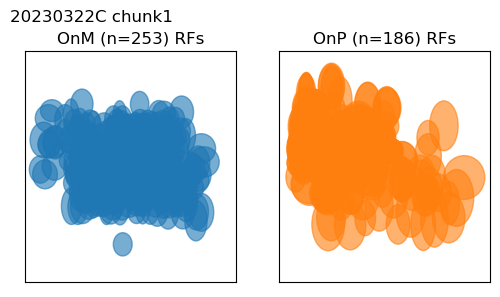

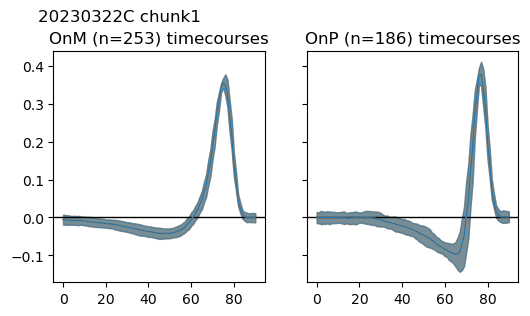

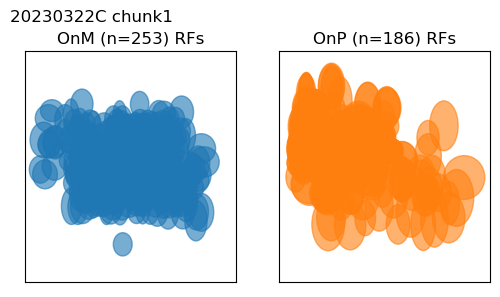

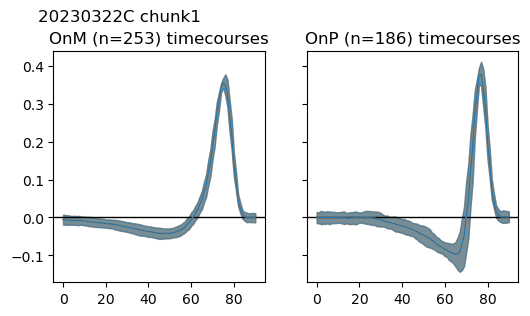

In [58]:
algo = 'kilosort2'
plot_all_mosaics(df_ct, algo)